<a href="https://colab.research.google.com/github/rselent/this_was_a_test/blob/master/build1_Airbnb_in_nyc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

nyc_map = mpimg.imread( 'https://raw.githubusercontent.com/rselent/this_was_a_test/master/New_York_City_2.png')

df = pd.read_csv( 'https://raw.githubusercontent.com/rselent/this_was_a_test/master/AB_NYC_2019.csv')
df = df.rename( columns= {'neighbourhood_group':'borough'})

df1 = df.drop( columns= {'host_name', 'number_of_reviews', 'last_review', 
                         'reviews_per_month', 'calculated_host_listings_count'})
print( df.shape)
print( df1.shape)
df1.head()

(48895, 16)
(48895, 11)


,id,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,0


In [0]:
## USE to draw city map underneath scatter plot, pass in the dataframe you want to use
## (wtf1, wtf2, df, etc) and what you want it colored by (borough, neighborhood, a price bin)
def nycMapPlot( dataDF, colorBy, plotTitle):
    sns.set_style( 'dark', {'ytick.left': True, 'xtick.bottom': True})
    sns.set_context( 'notebook')
    plt.figure( figsize= (12, 12))
    f= sns.scatterplot( x= 'longitude', y= 'latitude', data= dataDF, 
#                    hue= colorBy, s= 16, legend= False);
                    hue= colorBy, s= 16);
    plt.imshow( nyc_map, aspect= 'equal', extent=[ df['longitude'].min() - 0.0195, 
                                                   df['longitude'].max() + 0.027, 
                                                   df['latitude'].min() - 0.0069, 
                                                   df['latitude'].max() + 0.0025])
    f.set( xlabel= "Longitude", 
           ylabel= "Latitude",
           title= plotTitle)
#    plt.legend( handles= [dataDF], title= '', loc= 'upper left')
    plt.show()

##
def nycBarPlot( dataDF, colorBy, plotTitle):
    sns.set( style= 'darkgrid')
    f= sns.catplot( x= 'borough',  hue= colorBy, data= dataDF,
                    height= 9, kind= 'count', legend_out= False);
    f.set( xlabel= "NYC Borough", 
           ylabel= "Number of rentals",
           title= plotTitle)

##
def nycPricePlot( dataDF, colorBy, plotTitle):
    sns.set_style( 'darkgrid', {'ytick.left': True})
    f= sns.catplot( x= 'borough', y= 'price',  hue= colorBy, data=dataDF,
                   height= 9, jitter= '0.3', legend_out= False);
    f.set( xlabel= "NYC Boroughs", 
           ylabel= "Price, in USD",
           title= plotTitle)

In [0]:
### VALUE

# Through my work and exploration of this data, I expect my audience/customers/clients
# to have a better understanding or picture of the airbnb market in new york. 
#
# It sounds a little didactic, but hear me out, lol
#
# The value I intend to provide is not only in raw numbers (number of units, 
# distribution between each borough, distribution between each rental type, 
# and ranges of prices), but also in outlying data -- 
# potential things to watch out for, or properties who seem to be trying to 
# exploit a market or potential renters, or even skirt commercial rules 
# (e.g., number of properties with a minimum rental length of 30+ days 
# (that's what, a timeshare, at that point?), hosts who operate >5 properties 
# (a property management co, at that point), and so on)

In [178]:
 df1.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [165]:
######################################
###
###          IN THIS CONTAINER:      
###             HIGHLIGHTING    
###             outlier data
###
###       e.g. minimum_nights > 30
###     or a host_id that spans > 50
###              properties         
###
######################################



wtf1 = df1.loc[( df1['minimum_nights'] > 30), ['name', 'host_id', 'borough',
                                            'neighbourhood', 'latitude',
                                            'longitude', 'room_type',
                                            'price', 'minimum_nights']]
print( (df1['minimum_nights'] > 30).value_counts())
print( (df1['minimum_nights'] > 180).value_counts())
print( (df1['minimum_nights'] > 360).value_counts())


wtf2 = df1.loc[( df1.host_id.value_counts()[:116] ), ['name', 'host_id', 'borough',
                                            'neighbourhood', 'latitude',
                                            'longitude', 'room_type',
                                            'price', 'minimum_nights']]
print( "\n\n", wtf2.shape, "\n")
print( df1.host_id.value_counts()[:116], "\n\n" )

wtf2.head()

False    48148
True       747
Name: minimum_nights, dtype: int64
False    48814
True        81
Name: minimum_nights, dtype: int64
False    48851
True        44
Name: minimum_nights, dtype: int64


 (116, 9) 

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
            ... 
35927005      10
8792814       10
154258141     10
23878336      10
12485770       9
Name: host_id, Length: 116, dtype: int64 




,name,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights
327,Duplex w/ Terrace @ Box House Hotel,417504,Brooklyn,Greenpoint,40.73776,-73.95327,Private room,349,3
232,One bedroom Apt. in NYC,288031,Manhattan,Midtown,40.75890,-73.96991,Entire home/apt,250,30
121,3 Story Town House in Park Slope,119588,Brooklyn,South Slope,40.66499,-73.97925,Entire home/apt,400,2
103,2000 SF 3br 2bath West Village private townhouse,93790,Manhattan,West Village,40.73096,-74.00319,Entire home/apt,500,4
96,Light-filled classic Central Park,42032,Manhattan,Upper West Side,40.79764,-73.96177,Entire home/apt,140,3


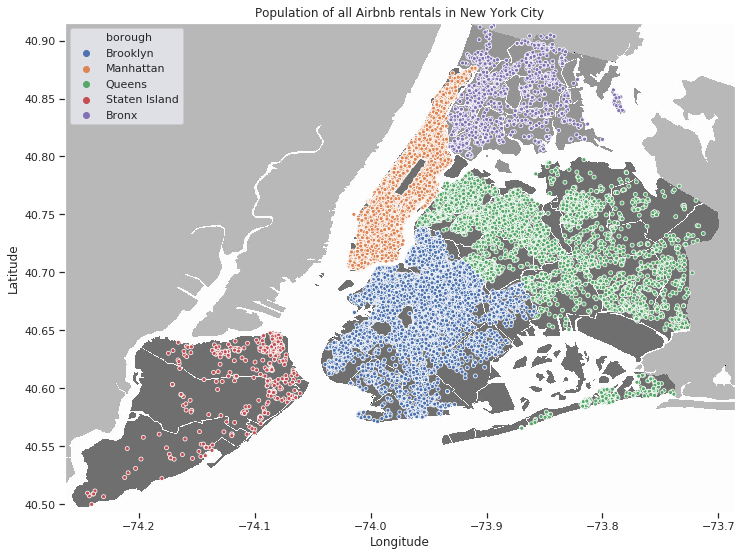

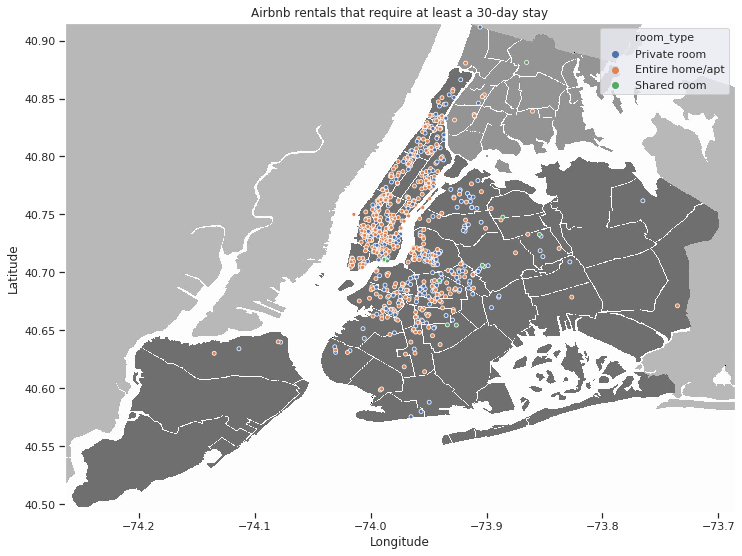

In [312]:
### CLEARLY, sorting by borough, we're able to see that airbnbs cover almost every
### available inch of New York City (not really, but there's a LOT)
### There are so many of them, though, that if we remove the map underlay, 
### we'd still largely be able to track or identify all 5 boroughs! 
### That's craaaaaaazy

nycMapPlot( df1, 'borough', 
           "Population of all Airbnb rentals in New York City")          ### CONTEXT [all]
nycMapPlot( wtf1, 'room_type', 
           "Airbnb rentals that require at least a 30-day stay")      ### Distribution of 30+ day only rentals, by type

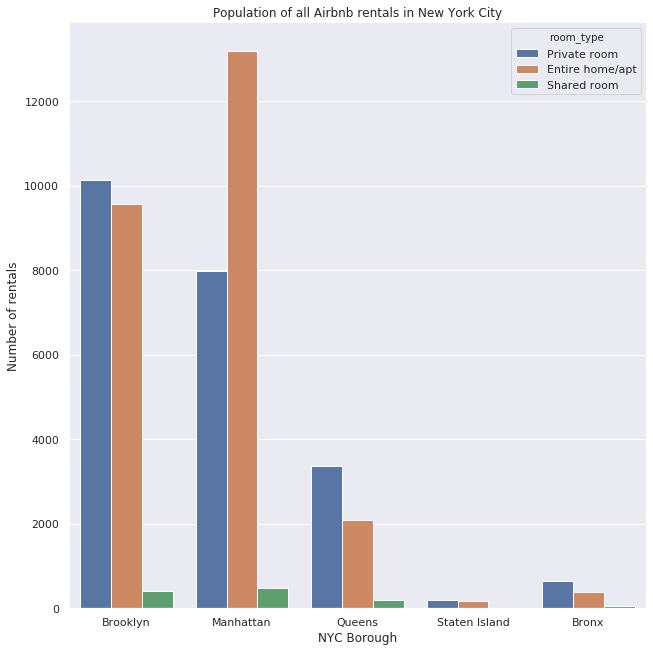

In [194]:
### Distribution of rental types, but from a different view

nycBarPlot( df1, 'room_type', 
           "Population of all Airbnb rentals in New York City")

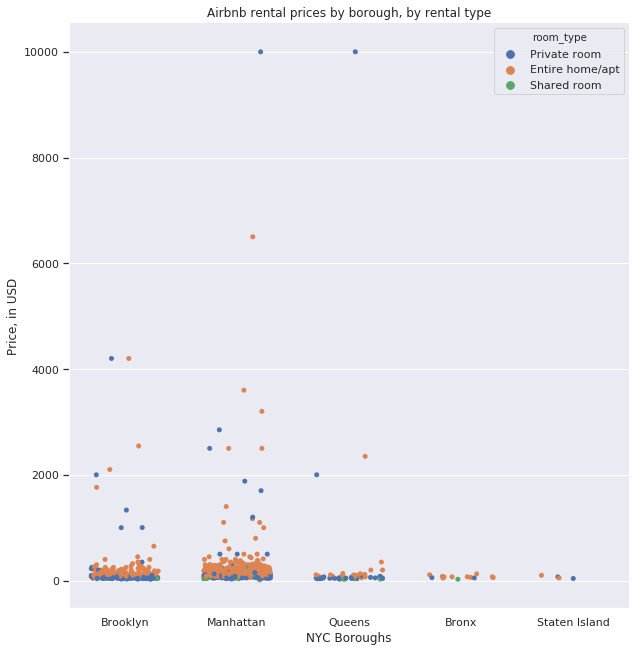

In [295]:
### MOVING ON to prices by borough, by rental type

nycPricePlot( wtf1, 'room_type',
             "Airbnb rental prices by borough, by rental type")

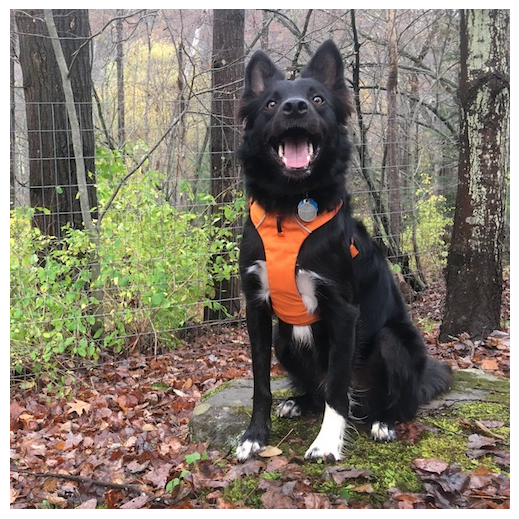

In [129]:
sns.dogplot()